In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
sns.set()

In [2]:
sd = dt.datetime(2008,1,1)
ed = dt.datetime(2011,12,31)

In [3]:
# read apple data
aapl = pd.read_csv('./data/AAPL.csv', index_col='Date',parse_dates=True,
                   na_values=['nan'],usecols=['Date','Adj Close'])

aapl = aapl.sort_index()

#aapl = aapl.rename(columns={'Adj Close':'AAPL'})

aapl = aapl[sd:ed]

aapl

,Adj Close
Date,
2008-01-02,194.01
2008-01-03,194.10
2008-01-04,179.28
2008-01-07,176.88
2008-01-08,170.52
...,...
2011-12-23,401.61
2011-12-27,404.79
2011-12-28,400.92


In [4]:
# read JMP data
jpm = pd.read_csv('./data/JPM.csv', index_col='Date',parse_dates=True,
                   na_values=['nan'],usecols=['Date','Adj Close'])

jpm = jpm.sort_index()

jpm = jpm[sd:ed]

#jpm = jpm.rename(columns={'Adj Close':'JPM'})

jpm

,Adj Close
Date,
2008-01-02,38.47
2008-01-03,38.20
2008-01-04,37.33
2008-01-07,37.71
2008-01-08,36.21
...,...
2011-12-23,32.84
2011-12-27,32.31
2011-12-28,31.94


In [5]:
#fetch data
aapl.iloc[0] # fetch first day


Adj Close    194.01
Name: 2008-01-02 00:00:00, dtype: float64

In [6]:
aapl.iloc[0]['Adj Close']

194.01

In [7]:
aapl.iloc[0][0]

194.01

In [8]:
aapl.iloc[-1]['Adj Close'] # last day

403.27

In [9]:
#aapl.loc[:,'position']
aapl


,Adj Close
Date,
2008-01-02,194.01
2008-01-03,194.10
2008-01-04,179.28
2008-01-07,176.88
2008-01-08,170.52
...,...
2011-12-23,401.61
2011-12-27,404.79
2011-12-28,400.92


In [10]:
jpm

,Adj Close
Date,
2008-01-02,38.47
2008-01-03,38.20
2008-01-04,37.33
2008-01-07,37.71
2008-01-08,36.21
...,...
2011-12-23,32.84
2011-12-27,32.31
2011-12-28,31.94


In [11]:
#calculate the normalize price
for stock_df in (aapl,jpm):
    stock_df['norm price'] = stock_df['Adj Close']/stock_df.iloc[0]['Adj Close']

    


In [12]:
jpm

,Adj Close,norm price
Date,,
2008-01-02,38.47,1.000000
2008-01-03,38.20,0.992982
2008-01-04,37.33,0.970367
2008-01-07,37.71,0.980244
2008-01-08,36.21,0.941253
...,...,...
2011-12-23,32.84,0.853652
2011-12-27,32.31,0.839875
2011-12-28,31.94,0.830257


In [13]:
# allocaiton %
# 60 in apple
# 40 in jpm

allocs = [0.6,0.4]
allocs

[0.6, 0.4]

In [14]:
for stock_df,allo in zip((aapl,jpm),allocs):
    stock_df['allocation'] = stock_df['norm price']*allo


In [15]:
aapl

,Adj Close,norm price,allocation
Date,,,
2008-01-02,194.01,1.000000,0.600000
2008-01-03,194.10,1.000464,0.600278
2008-01-04,179.28,0.924076,0.554446
2008-01-07,176.88,0.911706,0.547023
2008-01-08,170.52,0.878924,0.527354
...,...,...,...
2011-12-23,401.61,2.070048,1.242029
2011-12-27,404.79,2.086439,1.251863
2011-12-28,400.92,2.066491,1.239895


In [16]:
# starting value 100,000
sv = 100000

In [17]:
for stock_df in (aapl,jpm):
    stock_df['position'] = stock_df['allocation'] * sv
    

In [18]:
aapl

,Adj Close,norm price,allocation,position
Date,,,,
2008-01-02,194.01,1.000000,0.600000,60000.000000
2008-01-03,194.10,1.000464,0.600278,60027.833617
2008-01-04,179.28,0.924076,0.554446,55444.564713
2008-01-07,176.88,0.911706,0.547023,54702.334931
2008-01-08,170.52,0.878924,0.527354,52735.426009
...,...,...,...,...
2011-12-23,401.61,2.070048,1.242029,124202.876140
2011-12-27,404.79,2.086439,1.251863,125186.330602
2011-12-28,400.92,2.066491,1.239895,123989.485078


In [19]:
jpm

,Adj Close,norm price,allocation,position
Date,,,,
2008-01-02,38.47,1.000000,0.400000,40000.000000
2008-01-03,38.20,0.992982,0.397193,39719.261762
2008-01-04,37.33,0.970367,0.388147,38814.660775
2008-01-07,37.71,0.980244,0.392098,39209.773850
2008-01-08,36.21,0.941253,0.376501,37650.116974
...,...,...,...,...
2011-12-23,32.84,0.853652,0.341461,34146.087861
2011-12-27,32.31,0.839875,0.335950,33595.009098
2011-12-28,31.94,0.830257,0.332103,33210.293735


In [20]:
index =0
sym=['AAPL','JPM']
for stock_df in (aapl,jpm):
    print(sym[index])
    index+=1
    

AAPL
JPM


In [24]:
df = pd.DataFrame(index=pd.date_range(sd, ed))
index =0
sym=['AAPL','JPM']

df_temp = [aapl['position'],jpm['position']]

port_val = pd.concat(df_temp,axis=1)

#for stock_df in (aapl,jpm):
    #df_temp = stock_df['position']
    #print(df_temp)
    #df_temp = df_temp.rename(columns={'position':sym[index]})
    #df = df.join(df_temp)
    #index+=1
    

#aapl['position']   
    

In [25]:
port_val

,position,position
Date,,
2008-01-02,60000.000000,40000.000000
2008-01-03,60027.833617,39719.261762
2008-01-04,55444.564713,38814.660775
2008-01-07,54702.334931,39209.773850
2008-01-08,52735.426009,37650.116974
...,...,...
2011-12-23,124202.876140,34146.087861
2011-12-27,125186.330602,33595.009098
2011-12-28,123989.485078,33210.293735


In [28]:
port_val.columns =['AAPL','JPM']

In [29]:
port_val

,AAPL,JPM
Date,,
2008-01-02,60000.000000,40000.000000
2008-01-03,60027.833617,39719.261762
2008-01-04,55444.564713,38814.660775
2008-01-07,54702.334931,39209.773850
2008-01-08,52735.426009,37650.116974
...,...,...
2011-12-23,124202.876140,34146.087861
2011-12-27,125186.330602,33595.009098
2011-12-28,123989.485078,33210.293735


In [30]:
port_val['total port val'] = port_val.sum(axis=1)

In [88]:
port_val

,AAPL,JPM,total port val
Date,,,
2008-01-02,60000.000000,40000.000000,100000.000000
2008-01-03,60027.833617,39719.261762,99747.095379
2008-01-04,55444.564713,38814.660775,94259.225488
2008-01-07,54702.334931,39209.773850,93912.108781
2008-01-08,52735.426009,37650.116974,90385.542983
...,...,...,...
2011-12-23,124202.876140,34146.087861,158348.964001
2011-12-27,125186.330602,33595.009098,158781.339700
2011-12-28,123989.485078,33210.293735,157199.778813


In [43]:
#stats
portfolio = port_val['total port val']
#portfolio.columns.values[0] = 'f'

#portfolio.columns = ['portfolio']
#portfolio = portfolio.rename(columns={'total port val': 'portfolio'}) 
portfolio

Date
2008-01-02    100000.000000
2008-01-03     99747.095379
2008-01-04     94259.225488
2008-01-07     93912.108781
2008-01-08     90385.542983
                  ...      
2011-12-23    158348.964001
2011-12-27    158781.339700
2011-12-28    157199.778813
2011-12-29    158743.485402
2011-12-30    158540.010513
Name: total port val, Length: 1009, dtype: float64

In [52]:
#port_val.loc['total port val']
port_val.iloc[:,2:3]

,total port val
Date,
2008-01-02,100000.000000
2008-01-03,99747.095379
2008-01-04,94259.225488
2008-01-07,93912.108781
2008-01-08,90385.542983
...,...
2011-12-23,158348.964001
2011-12-27,158781.339700
2011-12-28,157199.778813


In [59]:
port = port_val.iloc[:,2:3]
port = port.rename(columns={'total port val':'total'})
port

,total
Date,
2008-01-02,100000.000000
2008-01-03,99747.095379
2008-01-04,94259.225488
2008-01-07,93912.108781
2008-01-08,90385.542983
...,...
2011-12-23,158348.964001
2011-12-27,158781.339700
2011-12-28,157199.778813


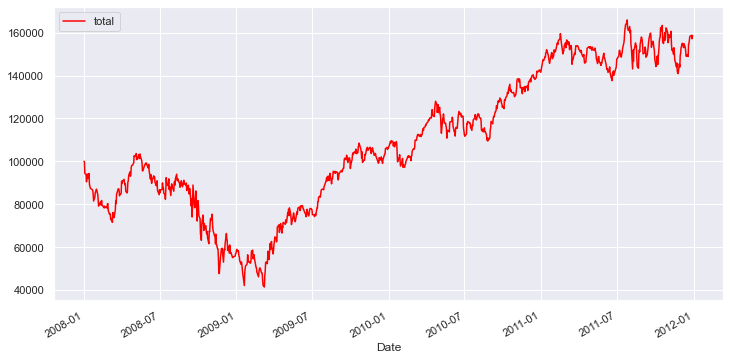

In [86]:
port.plot(figsize=(12,6),color='red')

In [61]:
daily_rets = (port/port.shift(1))-1

In [62]:
daily_rets

,total
Date,
2008-01-02,NaN
2008-01-03,-0.002529
2008-01-04,-0.055018
2008-01-07,-0.003683
2008-01-08,-0.037552
...,...
2011-12-23,0.010187
2011-12-27,0.002731
2011-12-28,-0.009961


In [63]:
daily_rets = daily_rets[1:]

In [64]:
daily_rets

,total
Date,
2008-01-03,-0.002529
2008-01-04,-0.055018
2008-01-07,-0.003683
2008-01-08,-0.037552
2008-01-09,0.033616
...,...
2011-12-23,0.010187
2011-12-27,0.002731
2011-12-28,-0.009961


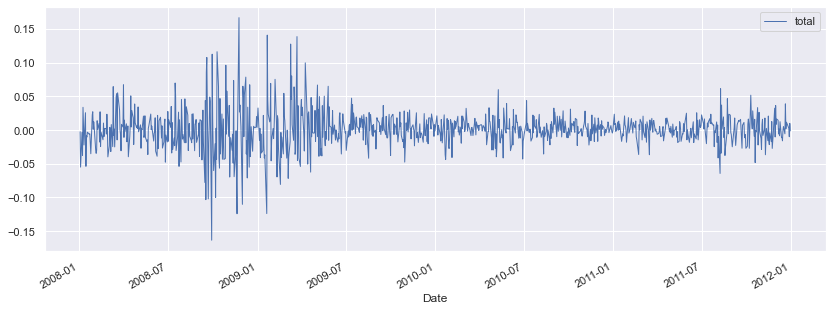

In [81]:
daily_rets.plot(figsize=(14,5),lw=1,label='Daily Return')
plt.legend()

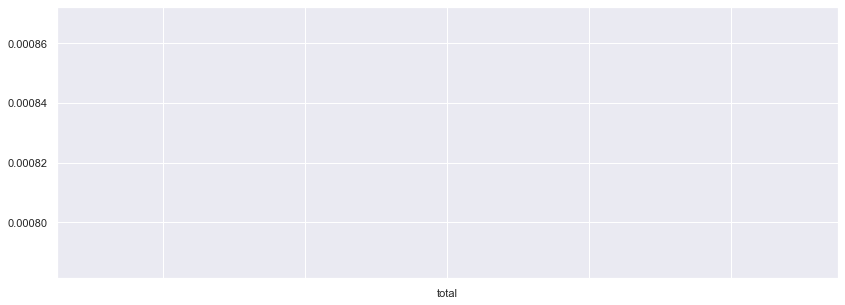

In [85]:
avg_daily_return = daily_rets.mean()
avg_daily_return.plot(figsize=(14,5),lw=1,color='red')

In [90]:
port_val

,AAPL,JPM,total port val
Date,,,
2008-01-02,60000.000000,40000.000000,100000.000000
2008-01-03,60027.833617,39719.261762,99747.095379
2008-01-04,55444.564713,38814.660775,94259.225488
2008-01-07,54702.334931,39209.773850,93912.108781
2008-01-08,52735.426009,37650.116974,90385.542983
...,...,...,...
2011-12-23,124202.876140,34146.087861,158348.964001
2011-12-27,125186.330602,33595.009098,158781.339700
2011-12-28,123989.485078,33210.293735,157199.778813


Text(0.5, 1.0, 'Total Portfolio Value')

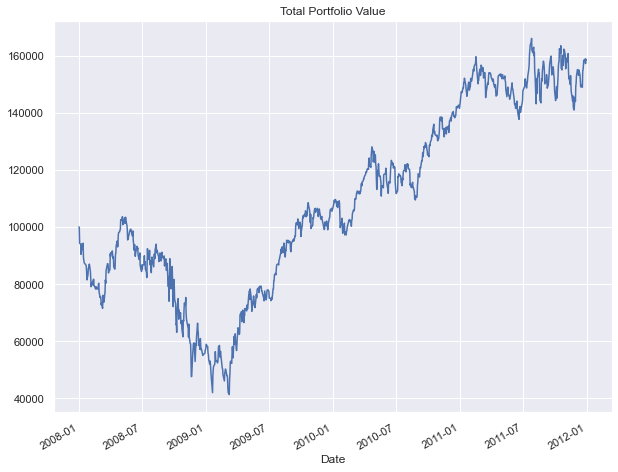

In [91]:
port_val['total port val'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

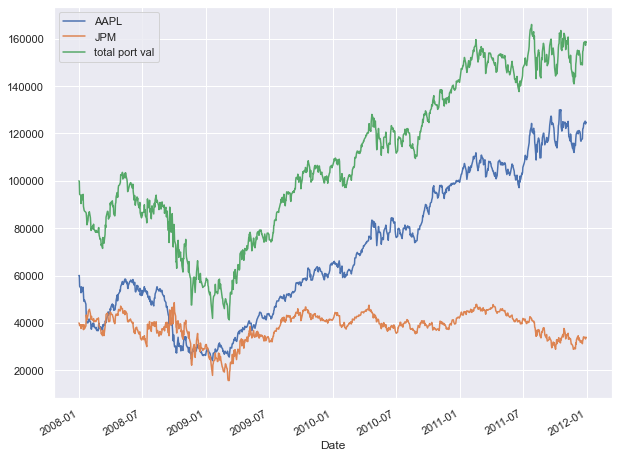

In [92]:
port_val.plot(figsize=(10,8))

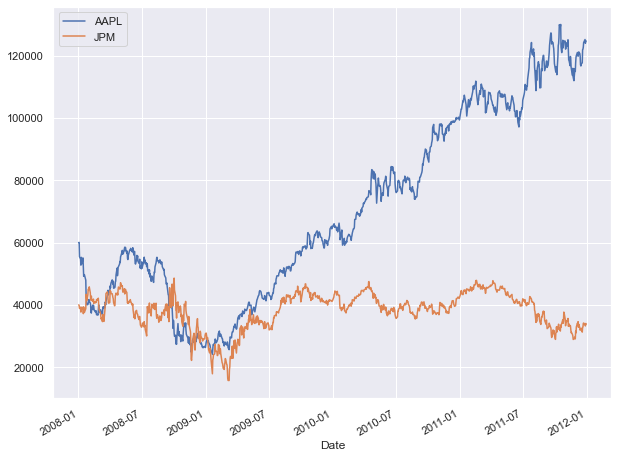

In [93]:
# individual position
port_val.drop('total port val',axis=1).plot(figsize=(10,8))